# Aggregate Points by Polygon
# Philadelphia Crime Incidents & Districts

In [1]:
# import libraries
from arcgis.gis import *
import getpass

In [2]:
# Utilize getpass for password management in Jupyter notebooks
password = getpass.getpass()

········


In [3]:
# Connect to GIS
gis = GIS('http://www.arcgis.com', 'abrown_citygov', password)
gis

GIS @ http://citygov.maps.arcgis.com version:6.4

In [4]:
# You can find and "get" content by itemID, service url, or searching
# Search for Police Boundaries District, use separate query variable
query = "title:Boundaries_District"
boundaries_s = gis.content.search(query=query, item_type="Feature Service")
boundaries = boundaries_s[0]
print(boundaries)

<Item title:"Boundaries_District" type:Feature Layer Collection owner:abrown_citygov>


In [8]:
# Search for Philadelphia Redacted Crime, put query directly in search
crime_s = gis.content.search("title:PhillyCrime", item_type="Feature Service")
incidents = crime_s[0]
print(incidents)

<Item title:"PhillyCrime" type:Feature Layer Collection owner:abrown_citygov>


In [9]:
# Import summarize data from features module
from arcgis.features import summarize_data

# Write aggregated layer to new feature service
crime_summary = summarize_data.aggregate_points(point_layer = incidents,
                                            polygon_layer = boundaries,
                                            keep_boundaries_with_no_points=False,
                                            output_name = 'crime_aggregation')
# If you remove the output_name variable in the aggregate_points call, it will create a temporary feature collection

<Item title:"Aggregation of 2018 Crime - Vandalism to Travel from Hubway_Stations 0.1 Miles (pre-run)" type:Feature Layer Collection owner:rach4489@esri.com_citygov>
<Item title:"crime_aggregation" type:Feature Layer Collection owner:abrown_citygov>


<Item title:"Aggregation of 2018 Crime - Vandalism to Travel from Hubway_Stations 0.1 Miles (pre-run)" type:Feature Layer Collection owner:rach4489@esri.com_citygov>
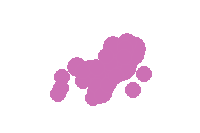

In [20]:
crime_agg = gis.content.search("title:crime_aggregation", item_type="Feature Service")
for item in crime_agg:
    print(item)
# Return list of all items returned

In [30]:
# Output of this analysis is second entry, so set as item 1 in list.
crime_data = crime_agg[1]
crime_layers = crime_data.layers
crime_output = crime_layers[0]


In [31]:
# Return only selected fields
query_result1 = crime_output.query(where='1=1', 
                                    out_fields='Point_Count, DISTRICT_')

In [32]:
# Show query results in data table
query_result1
query_result1.sdf

,DISTRICT_,OBJECTID,Point_Count,SHAPE
0,77,1,498,"{""rings"": [[[2674487.16439535, 212760.65150250..."
1,17,2,18666,"{""rings"": [[[2692953.28100634, 232266.62462958..."
2,6,3,26512,"{""rings"": [[[2701697.91870075, 236570.14325350..."
3,9,4,20699,"{""rings"": [[[2693482.59261176, 236493.20049400..."
4,26,5,20519,"{""rings"": [[[2703314.0916495, 239453.393392503..."
5,22,6,37811,"{""rings"": [[[2686483.90582176, 253430.01078042..."
6,25,7,37860,"{""rings"": [[[2706960.29531509, 263453.62951266..."
7,35,8,31137,"{""rings"": [[[2701755.58558017, 274818.82922317..."
8,18,9,26491,"{""rings"": [[[2687649.57934342, 234542.57480208..."
9,3,10,31742,"{""rings"": [[[2702924.93068242, 217065.83908633..."


In [35]:
# Create a map object
map1 = gis.map("Philadelphia")
map1.add_layer(query_result1)

In [36]:
map1

MapView(layout=Layout(height='400px', width='100%'))